In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

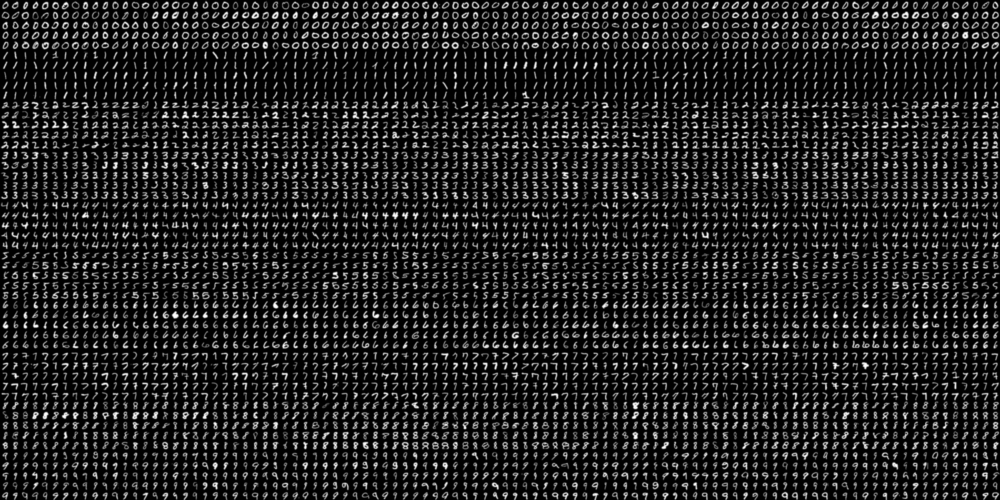

In [7]:
image = cv2.imread("digits.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
small = cv2.pyrDown(image)

cv2_imshow(small)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# Split the image to 5000 cells, each 20x20 size
# This gives us a 4-dim array: 50 x 100 x 20 x 20
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]

# Convert the List data type to Numpy Array of Shape (50, 100, 20, 20)
x = np.array(cells)
print("The shape of our cells array: " + str(x.shape))

# Split the full data set into two segments
# One will be used fro Training the model, the other as a test data set
train = x[:, :70].reshape(-1, 400).astype(np.float32) # Size = (3500, 400)
test = x[:, 70:100].reshape(-1, 400).astype(np.float32) # Size = [1500, 400]

# Create labels for train and test data
k = [0,1,2,3,4,5,6,7,8,9]
train_labels = np.repeat(k,350)[:, np.newaxis]
test_labels = np.repeat(k, 150)[:, np.newaxis]

# Initiate KNN, train the data, then test it with test data for k=3
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbors, distance = knn.findNearest(test, k=3)


# Now we check the accuracy of classification
# For that, compare the result with test_label and check which are wrong
matches = result == test_labels
correct = np.count_nonzero(matches)
accuracy = correct * (100.0 / result.size)
print("Accuracy is = %.2f" % accuracy + "%")


The shape of our cells array: (50, 100, 20, 20)
Accuracy is = 93.47%
